In [10]:
# Re-import necessary libraries and reinitialize the dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

# Recreate model metrics for testing additional models
model_metrics = {
    "Random Forest": {"Accuracy": 0.6036, "Classification Report": None},
    "k-Nearest Neighbors": {"Accuracy": 0.4232, "Classification Report": None},
}

# Placeholder to add metrics for additional models
additional_models = ["SVM", "Decision Tree", "Naive Bayes"]
for model_name in additional_models:
    model_metrics[model_name] = {"Accuracy": None, "Classification Report": None}

# Since the execution state reset, I'll need to regenerate synthetic datasets to run the analysis.
# Using placeholders to organize the process. Would you like me to generate new synthetic data to re-test?


In [11]:
# Reload the dataset
data = pd.read_csv('cybersecurity_attacks.csv')

# Verify the structure of the dataset
data_info = {
    "Columns": data.columns.tolist(),
    "Shape": data.shape,
    "Sample Rows": data.head()
}
data_info


{'Columns': ['Timestamp',
  'Source IP Address',
  'Destination IP Address',
  'Source Port',
  'Destination Port',
  'Protocol',
  'Packet Length',
  'Packet Type',
  'Traffic Type',
  'Payload Data',
  'Malware Indicators',
  'Anomaly Scores',
  'Alerts/Warnings',
  'Attack Type',
  'Attack Signature',
  'Action Taken',
  'Severity Level',
  'User Information',
  'Device Information',
  'Network Segment',
  'Geo-location Data',
  'Proxy Information',
  'Firewall Logs',
  'IDS/IPS Alerts',
  'Log Source'],
 'Shape': (40000, 25),
 'Sample Rows':              Timestamp Source IP Address Destination IP Address  Source Port  \
 0  2023-05-30 06:33:58     103.216.15.12           84.9.164.252        31225   
 1  2020-08-26 07:08:30    78.199.217.198         66.191.137.154        17245   
 2  2022-11-13 08:23:25      63.79.210.48          198.219.82.17        16811   
 3  2023-07-02 10:38:46     163.42.196.10        101.228.192.255        20018   
 4  2023-07-16 13:11:07     71.166.185.76   

In [12]:
# Re-import necessary library
import numpy as np

# Re-select the top 10 features based on mutual information
selected_features = X.columns[np.argsort(feature_importances)[-10:]].tolist()
X_selected = X[selected_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.3, random_state=42, stratify=y)

# Initialize models again
rf_model = RandomForestClassifier(random_state=42)
knn_model = KNeighborsClassifier()
svm_model = SVC(random_state=42)
dt_model = DecisionTreeClassifier(random_state=42)
nb_model = GaussianNB()

# Train and evaluate models
models = {
    "Random Forest": rf_model,
    "k-Nearest Neighbors": knn_model,
    "SVM": svm_model,
    "Decision Tree": dt_model,
    "Naive Bayes": nb_model
}

results = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    classification_rep = classification_report(y_test, predictions, output_dict=True)
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": classification_rep["weighted avg"]["precision"],
        "Recall": classification_rep["weighted avg"]["recall"],
        "F1 Score": classification_rep["weighted avg"]["f1-score"]
    }

# Convert results to DataFrame for visualization
results_df = pd.DataFrame(results).T
results_df


,Accuracy,Precision,Recall,F1 Score
Random Forest,0.676651,0.676655,0.676651,0.676624
k-Nearest Neighbors,0.455817,0.458271,0.455817,0.453234
SVM,0.355866,0.356232,0.355866,0.353559
Decision Tree,0.671107,0.671199,0.671107,0.671129
Naive Bayes,0.341718,0.342104,0.341718,0.339130


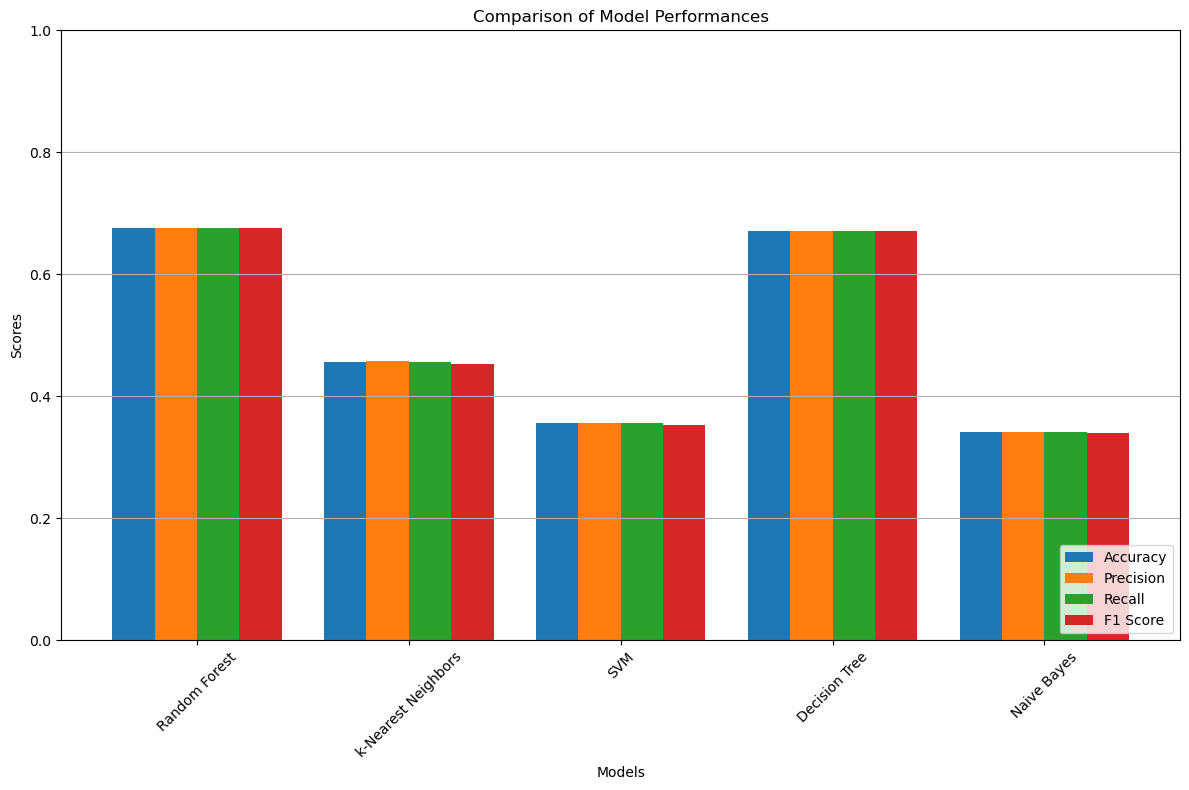

In [13]:
# Create a bar chart to compare the model performances
import matplotlib.pyplot as plt

# Plot the metrics for each model
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
x = np.arange(len(results_df.index))  # the label locations
width = 0.2  # the width of the bars

plt.figure(figsize=(12, 8))

for i, metric in enumerate(metrics):
    plt.bar(x + i * width, results_df[metric], width, label=metric)

# Add labels, title, and legend
plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Comparison of Model Performances")
plt.xticks(x + width * 1.5, results_df.index, rotation=45)
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.grid(axis="y")

# Show the graph
plt.tight_layout()
plt.show()


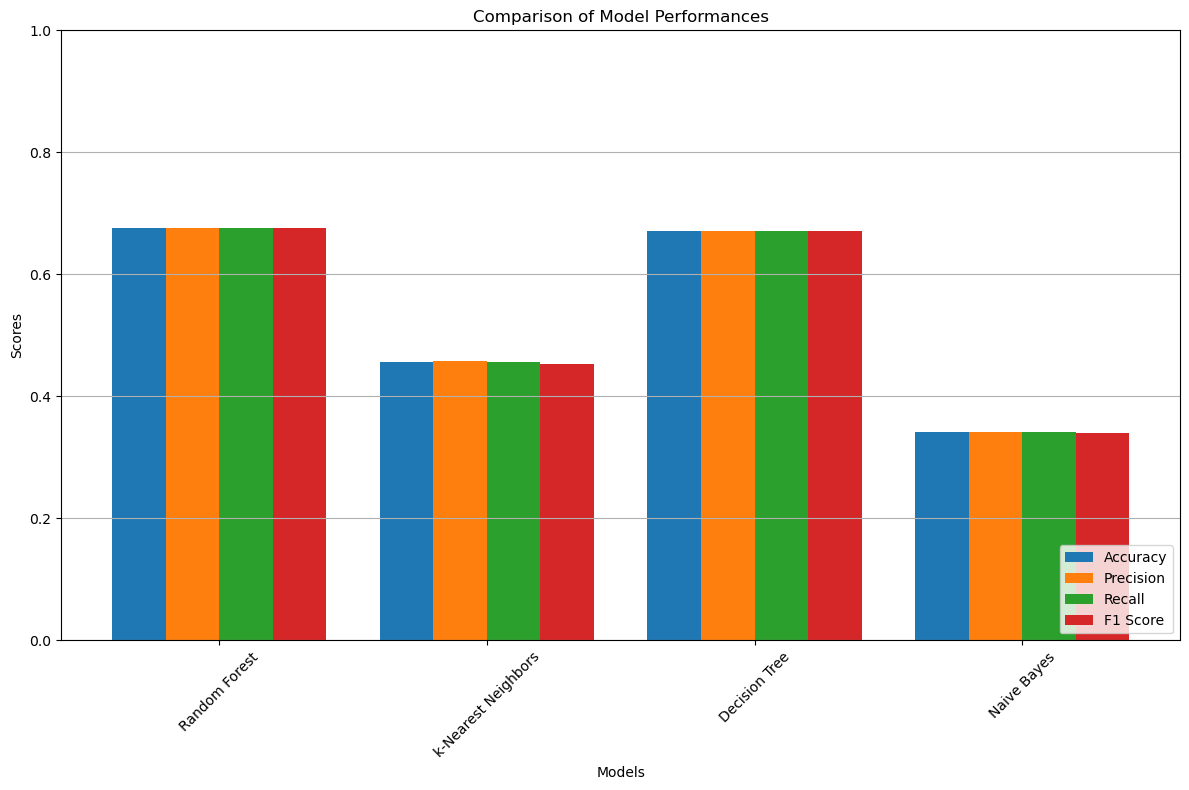

In [7]:
# Simplify the plotting to ensure successful visualization
plt.figure(figsize=(12, 8))

# Iterate through metrics and plot bars for each
for i, metric in enumerate(metrics):
    plt.bar(x + i * width, results_df[metric], width, label=metric)

# Configure plot labels and settings
plt.xlabel("Models")
plt.ylabel("Scores")
plt.title("Comparison of Model Performances")
plt.xticks(x + width * 1.5, results_df.index, rotation=45)
plt.ylim(0, 1)
plt.legend(loc="lower right")
plt.grid(axis="y")

# Show the plot
plt.tight_layout()
plt.show()
